### KNN을 이용한 농구선수 포지션 예측 

In [1]:
import pickle
# 데이터 불러오기
with open('./Data/pkl/basketball_train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)
with open('./Data/pkl/basketball_test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### 최적의 K찾기 (교차 검증)

In [4]:
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

In [11]:
cross_validation_score = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

In [12]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                            cv=10, scoring='accuracy')
    cross_validation_score.append(scores.mean())

In [28]:
y_train.values.ravel()

array(['C', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG',
       'SG', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG',
       'SG', 'C', 'C', 'C', 'SG', 'SG', 'SG', 'C', 'C', 'C', 'C', 'C',
       'SG', 'SG', 'C', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'SG', 'C',
       'SG', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'C', 'C', 'SG',
       'C', 'SG', 'SG', 'C', 'C', 'SG', 'SG', 'SG', 'SG', 'C', 'C', 'C',
       'C', 'C', 'SG', 'SG', 'C', 'C', 'C', 'C'], dtype=object)

In [ ]:
help(y_train.values.ravel())

In [ ]:
cross_validation_score

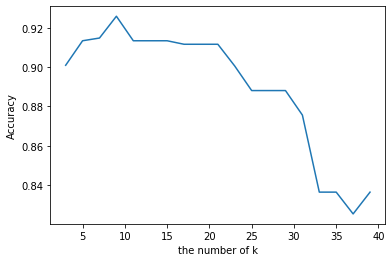

In [14]:
plt.plot(k_list, cross_validation_score)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [15]:
cvs = cross_validation_score
k = k_list[cvs.index(max(cross_validation_score))]
print("The best number of k : " + str(k))

The best number of k : 9


### 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [21]:
comparison = pd.DataFrame(
            {'prediction': pred, 'ground_truth': y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,SG,SG
3,SG,SG
4,SG,SG
5,SG,SG
6,C,C
7,C,C
8,SG,SG
9,C,C


In [22]:
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 1.0


### 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [32]:
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [33]:
comparison = pd.DataFrame(
                {'prediction': pred, 'ground_truth': y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,C,SG
2,SG,SG
3,SG,SG
4,SG,SG
5,SG,SG
6,C,C
7,C,C
8,SG,SG
9,C,C


In [34]:
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.9
